In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [26]:
df = pd.read_csv('Datasets/Preprocessed_df.csv')

In [27]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,preprocessed_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,i think that would benefit from learning at th...
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,dear principal if u change the school policy o...
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...


In [28]:
df.drop(['full_text', 'text_id'], axis = 1, inplace = True)

In [29]:
df.head()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,preprocessed_text
0,3.5,3.5,3.0,3.0,4.0,3.0,i think that would benefit from learning at th...
1,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...
2,3.0,3.5,3.0,3.0,3.0,2.5,dear principal if u change the school policy o...
3,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...
4,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...


In [92]:
def choose_regressors(regressor_name = "linear_regression"):
    """
    Takes a regressor as input and returns a corresponding regressor object
    """
    
    if regressor_name == 'linear_regression':
        return LinearRegression()
    elif regressor_name == 'lasso':
        return Lasso()
    elif regressor_name == 'ridge':
        return Ridge()
    elif regressor_name == 'elastic_net':
        return ElasticNet()
    elif regressor_name == 'decision_tree_regression':
        return DecisionTreeRegressor()
    elif regressor_name == 'random_forest_regression':
        return RandomForestRegressor()
    elif regressor_name == 'gradient_boosting_regression':
        return GradientBoostingRegressor()
    elif regressor_name == 'adaboost_regression':
        return AdaBoostRegressor()
    elif regressor_name == 'k_neighbors_regression':
        return KNeighborsRegressor()
    elif regressor_name == 'support_vector_regression':
        return SVR()
    elif regressor_name == 'xgboost_regression':
        return XGBRegressor()
    elif regressor_name == 'gaussian_naive_bayes_regression':
        return GaussianNB()
    else:
        raise ValueError(f"Regressor {regressor_name} not supported for regression problems.")

In [59]:
def extract_bow(corpus, only_fit = True):
    """
    Takes a list of text documents as input and returns the BoW representation as a sparse matrix
    """
    vectorizer = CountVectorizer()
    if only_fit:
        vectorizer.fit(corpus)
        return vectorizer
    else:
        bow_representation = vectorizer.fit_transform(corpus)
        return vectorizer, bow_representation

In [72]:
def calc_mse(y_true, y_pred):
    """
    Calculates the mean squared error (MSE) between the true and predicted values
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

def calc_mse(y_true, y_pred):
    """
    Calculates the mean squared error (MSE) between the true and predicted values
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

def calc_mae(y_true, y_pred):
    """
    Calculates the mean absolute error (MAE) between the true and predicted values
    """
    mae = mean_absolute_error(y_true, y_pred)
    return mae

def calc_rmse(y_true, y_pred):
    """
    Calculates the root mean squared error (RMSE) between the true and predicted values
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def calc_mape(y_true, y_pred):
    """
    Calculates the mean absolute percentage error (MAPE) between the true and predicted values
    """
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def calc_r2_score(y_true, y_pred):
    """
    Calculates the R2 score between the true and predicted values
    """
    r2 = r2_score(y_true, y_pred)
    return r2

In [105]:
# Calculate and print MSE
def print_metrics_function(y_actual, y_predictions):
    
    # Calculate and print MSE
    mse = calc_mse(y_actual, y_predictions)
    print("MSE:", mse)

    # Calculate and print RMSE
    rmse = calc_rmse(y_actual, y_predictions)
    print("RMSE:", rmse)
    
    # Calculate and print MAE
    mae = calc_mae(y_actual, y_predictions)
    print("MAE:", mae)

    # Calculate and print MAPE
    mape = calc_mape(y_actual, y_predictions)
    print("MAPE:", mape)

    # Calculate and print R2 score
    r2 = calc_r2_score(y_actual, y_predictions)
    print("R2 Score:", r2)
    
    return mse, rmse, mae, mape, r2

In [48]:
df.head()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,preprocessed_text
0,3.5,3.5,3.0,3.0,4.0,3.0,i think that would benefit from learning at th...
1,2.5,2.5,3.0,2.0,2.0,2.5,when a problem is a change you have to let it ...
2,3.0,3.5,3.0,3.0,3.0,2.5,dear principal if u change the school policy o...
3,4.5,4.5,4.5,4.5,4.0,5.0,the best time in life is when you become yours...
4,2.5,3.0,3.0,3.0,2.5,2.5,small act of kindness can impact in other peop...


In [49]:
cohesion = df['cohesion']
syntax = df['syntax']
vocabulary = df['vocabulary']
phraseology = df['phraseology']
grammar = df['grammar']
conventions = df['conventions']

preprocessed_text = df['preprocessed_text']

In [50]:
X = preprocessed_text
y_cohesion = cohesion
y_syntax = syntax
y_vocabulary = vocabulary
y_phraseology = phraseology
y_grammar = grammar
y_conventions = conventions

X_train, X_test, y_train_cohesion, y_test_cohesion = train_test_split(X, y_cohesion, 
                                                                     shuffle = True, 
                                                                     random_state = 101, 
                                                                     test_size = 0.2)

X_train, X_test, y_train_syntax, y_test_syntax = train_test_split(X, y_syntax, 
                                                                     shuffle = True, 
                                                                     random_state = 101, 
                                                                     test_size = 0.2)

X_train, X_test, y_train_vocabulary, y_test_vocabulary = train_test_split(X, y_vocabulary, 
                                                                     shuffle = True, 
                                                                     random_state = 101, 
                                                                     test_size = 0.2)

X_train, X_test, y_train_phraseology, y_test_phraseology = train_test_split(X, y_phraseology, 
                                                                     shuffle = True, 
                                                                     random_state = 101, 
                                                                     test_size = 0.2)

X_train, X_test, y_train_grammar, y_test_grammar = train_test_split(X, y_grammar, 
                                                                     shuffle = True, 
                                                                     random_state = 101, 
                                                                     test_size = 0.2)

X_train, X_test, y_train_conventions, y_test_conventions = train_test_split(X, y_conventions, 
                                                                     shuffle = True, 
                                                                     random_state = 101, 
                                                                     test_size = 0.2)

In [52]:
print("The shape of input train data: {}".format(X_train.shape))
print("The shape of input test data: {}".format(X_test.shape))
print("------------------------------------------")
print("The shape of output train data: {}".format(y_train_cohesion.shape))
print("The shape of output test data: {}".format(y_test_cohesion.shape))

The shape of input train data: (3128,)
The shape of input test data: (783,)
------------------------------------------
The shape of output train data: (3128,)
The shape of output test data: (783,)


### Bag-of-Words Vectorizer

In [61]:
bow_vectorizer, X_train_bow = extract_bow(X_train, only_fit = False)
X_test_bow = bow_vectorizer.transform(X_test)

### Models with Metrics (Cohesion)

In [106]:
print("-----------------------Linear Regression-----------------------")
model = choose_regressors("linear_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_linear_reg, rmse_linear_reg, mae_linear_reg, mape_linear_reg, r2_linear_reg = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Lasso Regression-----------------------")
model = choose_regressors("lasso")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_lasso, rmse_lasso, mae_lasso, mape_lasso, r2_lasso = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Ridge Regression-----------------------")
model = choose_regressors("ridge")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_ridge, rmse_ridge, mae_ridge, mape_ridge, r2_ridge = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Elastic Net-----------------------")
model = choose_regressors("elastic_net")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_elastic_net, rmse_elastic_net, mae_elastic_net, mape_elastic_net, r2_elastic_net = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Decision Tree Regression-----------------------")
model = choose_regressors("decision_tree_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_decision_tree, rmse_decision_tree, mae_decision_tree, mape_decision_tree, r2_decision_tree = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Random Forest Regression-----------------------")
model = choose_regressors("random_forest_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_random_forest, rmse_random_forest, mae_random_forest, mape_random_forest, r2_random_forest = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Gradient Boosting Regression-----------------------")
model = choose_regressors("gradient_boosting_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_gradient_boosting, rmse_gradient_boosting, mae_gradient_boosting, mape_gradient_boosting, r2_gradient_boosting = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Adaboost Regression-----------------------")
model = choose_regressors("adaboost_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_adaboost, rmse_adaboost, mae_adaboost, mape_adaboost, r2_adaboost = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------K Neighbors Regression-----------------------")
model = choose_regressors("k_neighbors_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_k_neighbors, rmse_k_neighbors, mae_k_neighbors, mape_k_neighbors, r2_k_neighbors = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Support Vector Regression-----------------------")
model = choose_regressors("support_vector_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_svr, rmse_svr, mae_svr, mape_svr, r2_svr = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Xgboost Regression-----------------------")
model = choose_regressors("xgboost_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_xgboost, rmse_xgboost, mae_xgboost, mape_xgboost, r2_xgboost = print_metrics_function(y_test_cohesion, y_predictions)

-----------------------Linear Regression-----------------------
MSE: 2.0745833645395626
RMSE: 1.4403414055492407
MAE: 1.0719633812525378
MAPE: 35.13028359246971
R2 Score: -3.7255632105864898


-----------------------Lasso Regression-----------------------
MSE: 0.43681169710650053
RMSE: 0.6609173148787226
MAE: 0.5354061017606635
MAPE: 18.09968243611829
R2 Score: 0.005014056758111396


-----------------------Ridge Regression-----------------------
MSE: 1.006517121591656
RMSE: 1.0032532689165063
MAE: 0.7769694932143353
MAPE: 25.718056329965165
R2 Score: -1.292682165449916


-----------------------Elastic Net-----------------------
MSE: 0.42709132105093783
RMSE: 0.6535222422006292
MAE: 0.5275566922629452
MAPE: 17.85305382038154
R2 Score: 0.027155491161942935


-----------------------Decision Tree Regression-----------------------
MSE: 0.6989144316730523
RMSE: 0.8360110236552221
MAE: 0.6558109833971902
MAPE: 21.85676782420077
R2 Score: -0.592013308366214


-----------------------Random Fore

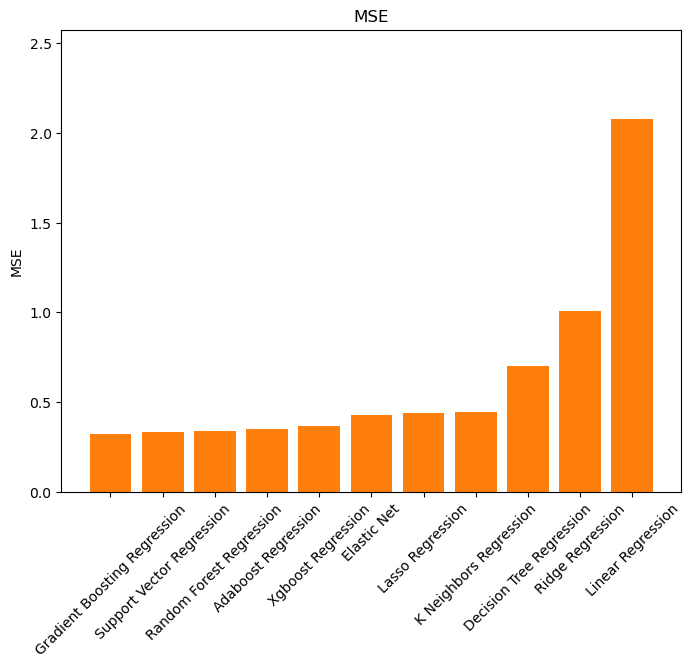

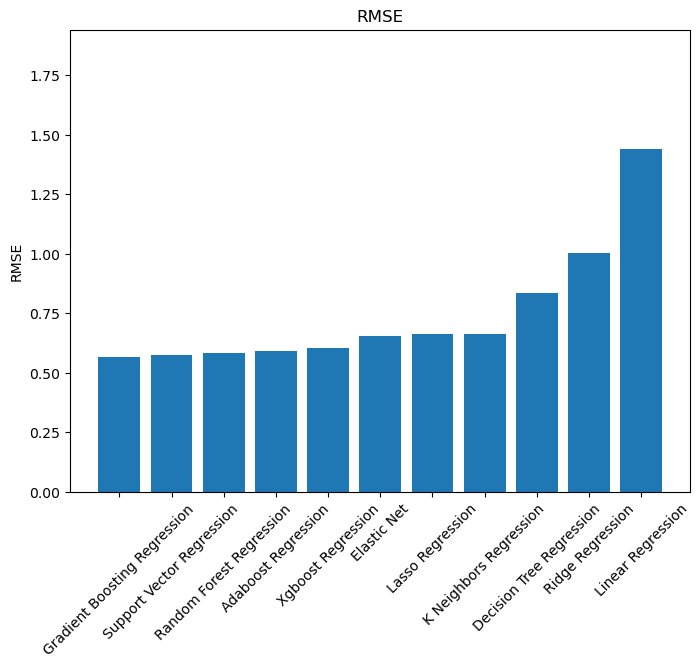

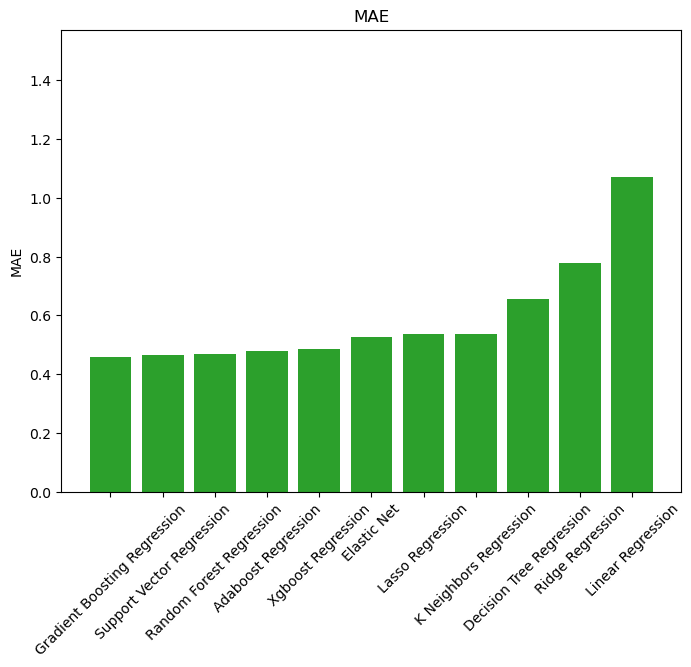

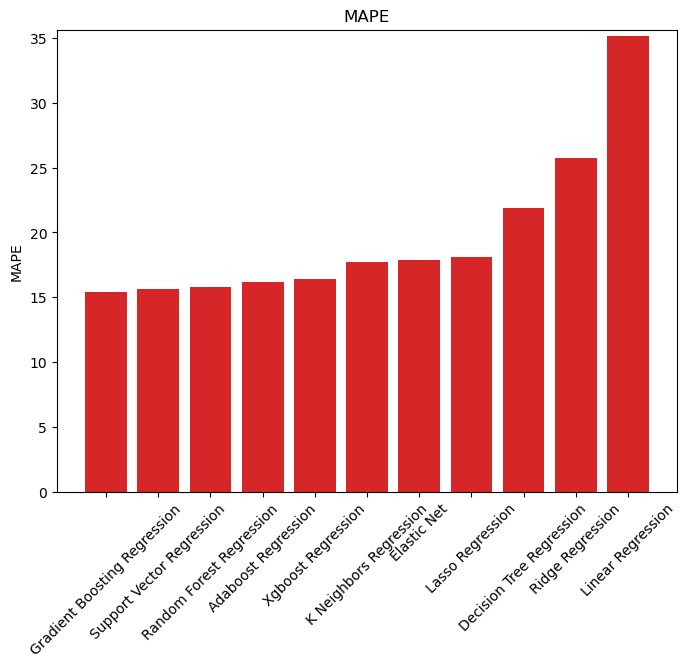

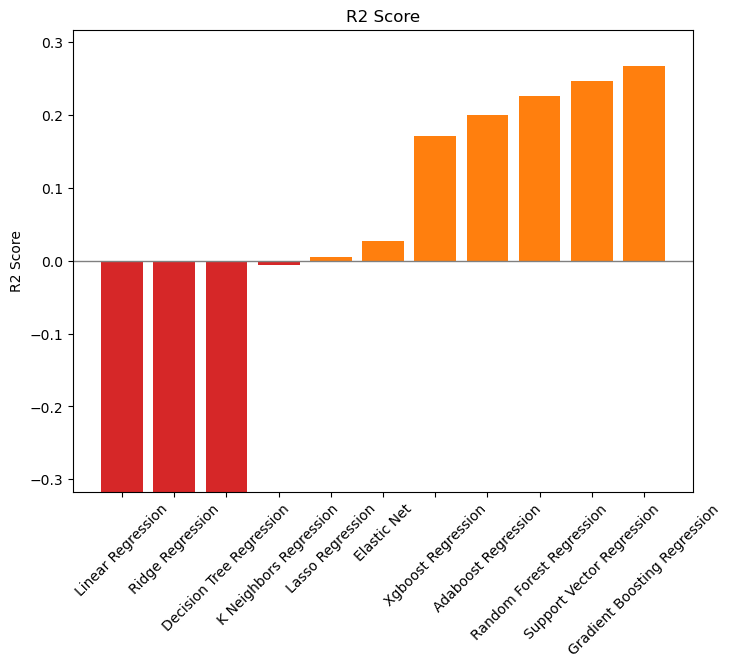

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x axis labels
labels = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net",
          "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression",
          "Adaboost Regression", "K Neighbors Regression", "Support Vector Regression", "Xgboost Regression"]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#9467bd"]

# Define the metric names and their corresponding values
metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2 Score"]
metrics_list = [[mse_linear_reg, mse_lasso, mse_ridge, mse_elastic_net, mse_decision_tree,
                mse_random_forest, mse_gradient_boosting, mse_adaboost, mse_k_neighbors,
                mse_svr, mse_xgboost],
               [rmse_linear_reg, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_decision_tree,
                rmse_random_forest, rmse_gradient_boosting, rmse_adaboost, rmse_k_neighbors,
                rmse_svr, rmse_xgboost],
               [mae_linear_reg, mae_lasso, mae_ridge, mae_elastic_net, mae_decision_tree,
                mae_random_forest, mae_gradient_boosting, mae_adaboost, mae_k_neighbors,
                mae_svr, mae_xgboost],
               [mape_linear_reg, mape_lasso, mape_ridge, mape_elastic_net, mape_decision_tree,
                mape_random_forest, mape_gradient_boosting, mape_adaboost, mape_k_neighbors,
                mape_svr, mape_xgboost],
               [r2_linear_reg, r2_lasso, r2_ridge, r2_elastic_net, r2_decision_tree,
                r2_random_forest, r2_gradient_boosting, r2_adaboost, r2_k_neighbors,
                r2_svr, r2_xgboost]]

# Plot each model for a single metric
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding model names
    values = metrics_list[i]
    sorted_indices = np.argsort(values)
    sorted_values = [values[j] for j in sorted_indices]
    sorted_labels = [labels[j] for j in sorted_indices]
    
    if metric_name == "R2 Score":
        # Define the colors for positive and negative bars
        pos_color = colors[0]
        neg_color = colors[3]
        
        # Split the sorted values into positive and negative lists
        pos_values = [val if val > 0 else 0 for val in sorted_values]
        neg_values = [val if val < 0 else 0 for val in sorted_values]
        
        # Create the figure and axes for the diverging bar plot
        fig, ax = plt.subplots(figsize=(8,6))
        
        # Plot the positive bars first
        ax.bar(sorted_labels, pos_values, color=pos_color)
        
        # Plot the negative bars on top of the positive bars
        ax.bar(sorted_labels, neg_values, color=neg_color)
        
        # Set the y limits based on the maximum absolute value of the metric
        y_limit = max(sorted_values) + 0.05
        ax.set_ylim([-y_limit, y_limit])

        # Set the title, labels, and ticks for the plot
        ax.set_title(metric_name)
        ax.set_ylabel(metric_name)
        ax.axhline(y=0, color='gray', linewidth=1) # Add a horizontal line at y=0
        plt.xticks(rotation=45)

        # Display the plot
        plt.show()
    
    else:
        # For the other metrics, create a regular bar plot
        fig, ax = plt.subplots(figsize=(8,6))
        ax.bar(sorted_labels, sorted_values, color=colors[i])
        ax.set_title(metric_name)
        ax.set_ylabel(metric_name)
        ax.set_ylim([0, max(sorted_values)+0.5])
        plt.xticks(rotation=45)
        plt.show()

In [118]:
from prettytable import PrettyTable

# Define the metric names and their corresponding values
metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2 Score"]
metrics_list = [[mse_linear_reg, mse_lasso, mse_ridge, mse_elastic_net, mse_decision_tree,
                mse_random_forest, mse_gradient_boosting, mse_adaboost, mse_k_neighbors,
                mse_svr, mse_xgboost],
               [rmse_linear_reg, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_decision_tree,
                rmse_random_forest, rmse_gradient_boosting, rmse_adaboost, rmse_k_neighbors,
                rmse_svr, rmse_xgboost],
               [mae_linear_reg, mae_lasso, mae_ridge, mae_elastic_net, mae_decision_tree,
                mae_random_forest, mae_gradient_boosting, mae_adaboost, mae_k_neighbors,
                mae_svr, mae_xgboost],
               [mape_linear_reg, mape_lasso, mape_ridge, mape_elastic_net, mape_decision_tree,
                mape_random_forest, mape_gradient_boosting, mape_adaboost, mape_k_neighbors,
                mape_svr, mape_xgboost],
               [r2_linear_reg, r2_lasso, r2_ridge, r2_elastic_net, r2_decision_tree,
                r2_random_forest, r2_gradient_boosting, r2_adaboost, r2_k_neighbors,
                r2_svr, r2_xgboost]]

# Define the ML model names
model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net",
          "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression",
          "Adaboost Regression", "K Neighbors Regression", "Support Vector Regression", "Xgboost Regression"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]
        row.append(f"{value:.3f}") # Format the value with three decimal places
    table.add_row(row)

# Print the formatted table
print(table.get_string())

+------------------------------+-------+-------+-------+--------+----------+
|            Model             |  MSE  |  RMSE |  MAE  |  MAPE  | R2 Score |
+------------------------------+-------+-------+-------+--------+----------+
|      Linear Regression       | 2.075 | 1.440 | 1.072 | 35.130 |  -3.726  |
|       Lasso Regression       | 0.437 | 0.661 | 0.535 | 18.100 |  0.005   |
|       Ridge Regression       | 1.007 | 1.003 | 0.777 | 25.718 |  -1.293  |
|         Elastic Net          | 0.427 | 0.654 | 0.528 | 17.853 |  0.027   |
|   Decision Tree Regression   | 0.699 | 0.836 | 0.656 | 21.857 |  -0.592  |
|   Random Forest Regression   | 0.340 | 0.583 | 0.468 | 15.752 |  0.227   |
| Gradient Boosting Regression | 0.322 | 0.567 | 0.457 | 15.418 |  0.267   |
|     Adaboost Regression      | 0.351 | 0.593 | 0.480 | 16.161 |  0.200   |
|    K Neighbors Regression    | 0.442 | 0.664 | 0.536 | 17.723 |  -0.006  |
|  Support Vector Regression   | 0.330 | 0.575 | 0.466 | 15.620 |  0.247   |